In [ ]:
model_path = "model/yolo11n.onnx"
yaml_path = "model/coco8.yaml"
image_path = "data/bus.jpg"
save_image_path = "output/bus_det.jpg"
video_path = "data/pedestrian_1.mp4"
save_video_path = "output/pedestrian_1_det.mp4"

## 测试图片

2025-12-15 23:46:42,888 - INFO - __init__ - root_path: /mnt/e/ProgramFiles/det_mot_py
2025-12-15 23:46:42,992 - INFO - init_onnx_model - ONNX model successfully initialized
2025-12-15 23:46:42,993 - INFO - __init__ - Init  cost: 97.08 ms


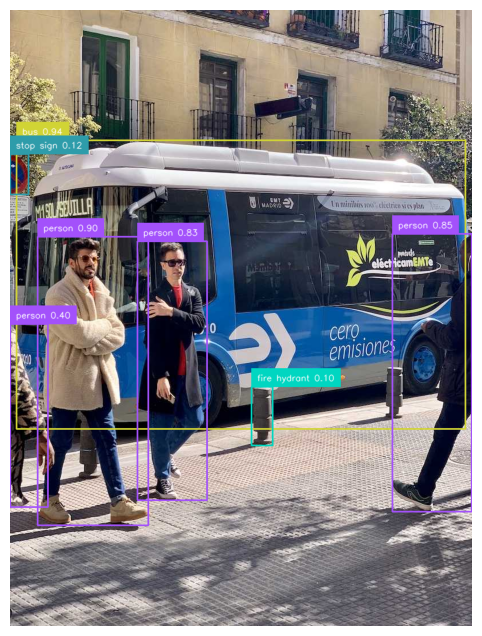

In [ ]:
import supervision as sv
from det.yolo11_infer import YOLOv11
import cv2

model = YOLOv11(model_path, yaml_path)
image = cv2.imread(image_path)
results, _ = model.infer_one_img(image, conf_thr=0.1, iou_thr=0.2)  # 推理图片
detections = model.get_sv_result(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()
labels = [
    f"{model.classes_name[class_id]} {confidence:.2f}" 
    for class_id, confidence in zip(detections.class_id, detections.confidence)
]
annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections,labels = labels)

sv.plot_image(image=annotated_image, size=(8, 8)) 

## 测试视频

In [11]:
import supervision as sv
from det.yolo11_infer import YOLOv11
import numpy as np

model = YOLOv11(model_path, yaml_path)

def det_callback(frame: np.ndarray, index: int):
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    results, _ = model.infer_one_img(frame, conf_thr=0.1, iou_thr=0.2)  # 推理图片
    detections = model.get_sv_result(results)
    labels = [
        f"{model.classes_name[class_id]} {confidence:.2f}"
        for class_id, confidence in zip(detections.class_id, detections.confidence)
    ]
    # 标注
    annotated_frame = box_annotator.annotate(scene=frame, detections=detections)
    annotated_frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)
    return annotated_frame


sv.process_video(
    source_path=video_path,
    target_path=save_video_path,
    callback=det_callback,
    show_progress=True
)

2025-12-15 23:52:00,187 - INFO - __init__ - root_path: /mnt/e/ProgramFiles/det_mot_py
2025-12-15 23:52:00,302 - INFO - init_onnx_model - ONNX model successfully initialized
2025-12-15 23:52:00,303 - INFO - __init__ - Init  cost: 103.68 ms
Processing video: 100%|██████████| 128/128 [00:08<00:00, 15.47it/s]
